We use this to analyze entropies of adversarial and nonadversarial input

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, load the member (training data) entropies

In [2]:
# Open the file
file = open("entropies_train.txt", "r")

# Read it into a DataFrame
df = pd.read_csv(file, header=None, names=["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "T11", "T12", "Early exit entropy", "Full entropy"])

print(df)

print(f"Mean EE: {np.mean(df['Early exit entropy'])}")
print(f"Std EE: {np.std(df['Early exit entropy'])}")
print(f"Mean Full: {np.mean(df['Full entropy'])}")
print(f"Std Full: {np.std(df['Full entropy'])}")

       T1    T2    T3    T4    T5    T6    T7    T8    T9   T10  T11  T12  \
0    1746   141   631  2032     6     0     0     0     0     0    0    0   
1    2231  2255  2721   407  1313     0     0     0     0     0    0    0   
2      11  2721   152  2115  2404  2688  2195     0     0     0    0    0   
3    2510   631  2542  1414  1680  1479     0     0     0     0    0    0   
4     720   631  2542   858  2246     0     0     0     0     0    0    0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
481  2542   851  2465  1335  1009  1669   759  2432   695     0    0    0   
482  2721    11  2317   323  2351  2377   814   593   929  2667  549    0   
483  2542   217  2478  1009     1   877   814  2446  2572     0    0    0   
484   441  2199  2542   377  2056  1793  1956   323  2647     0    0    0   
485   323  1889  2718  2675  1114   631   749  1289   982  1106    0    0   

     Early exit entropy  Full entropy  
0              0.968839      0.9175

Histograms

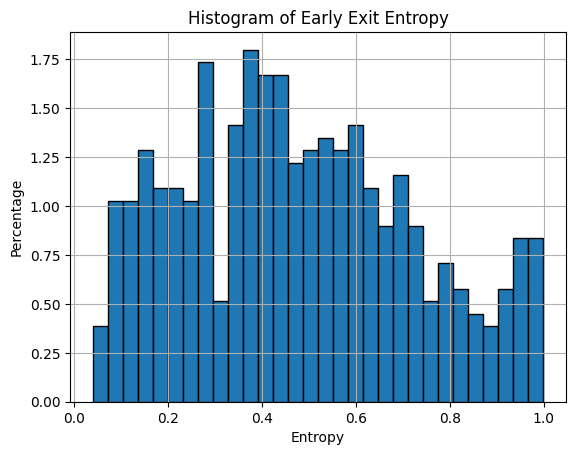

In [3]:
plt.hist(df["Early exit entropy"], bins=30, edgecolor='black', density=True)
plt.title("Histogram of Early Exit Entropy")
plt.xlabel("Entropy")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

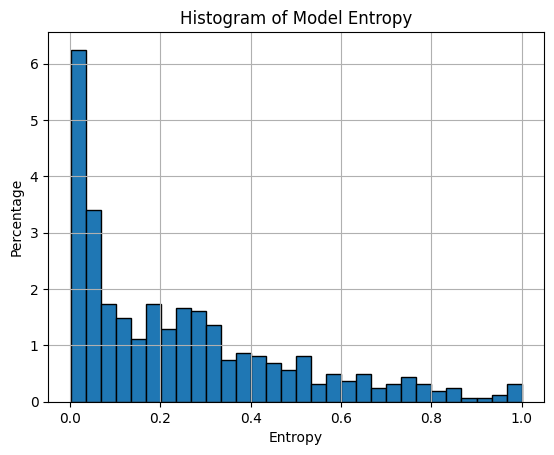

In [4]:
plt.hist(df["Full entropy"], bins=30, edgecolor='black', density=True)
plt.title("Histogram of Model Entropy")
plt.xlabel("Entropy")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

Now, let's look at nonmember (test data) inputs

In [5]:
# Open the file
file = open("entropies_test.txt", "r")

# Read it into a DataFrame
df = pd.read_csv(file, header=None, names=["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "T11", "T12", "Early exit entropy", "Full entropy"])

print(df)
print(f"Mean EE: {np.mean(df['Early exit entropy'])}")
print(f"Std EE: {np.std(df['Early exit entropy'])}")
print(f"Mean Full: {np.mean(df['Full entropy'])}")
print(f"Std Full: {np.std(df['Full entropy'])}")

       T1    T2    T3    T4    T5    T6    T7    T8    T9   T10   T11   T12  \
0       1     1  2542   120   687     1  2144  2611     1  2675   323  2185   
1    1199  1825     1  2611  2734  2255  1798   255  2675     1    86  2611   
2    1825     1  2542   159     1     1  2675   530     1  2424  2542  1031   
3       1     1  2433  1405  2542  2176  2434  2611   788   159     1   877   
4       1     1  2255   614  1350   856     1     1  2542     1  2611     1   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
295     1     1  2550     1  2675     1  2611     1  2219     1     1     0   
296     1  1378     1  2352     1  1756     1  1335  2542  2440     0     0   
297     1     1  2444     1     1     1     1     1   856     1  2498     0   
298     1     1     1  1212  2611     1  2219     1     1     0     0     0   
299     1     1     1     1     1     1  2404     1     1     1     0     0   

     Early exit entropy  Full entropy  
0          

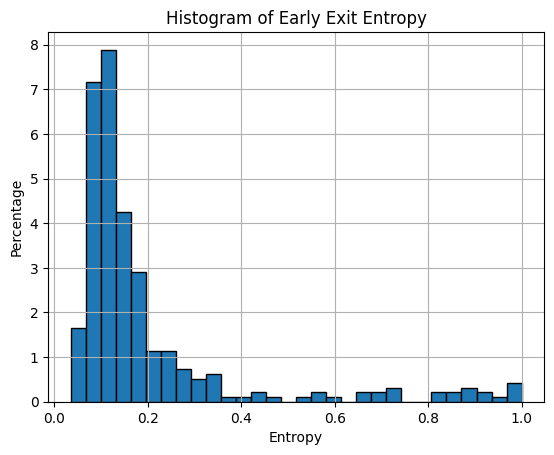

In [6]:
plt.hist(df["Early exit entropy"], bins=30, edgecolor='black', density=True)
plt.title("Histogram of Early Exit Entropy")
plt.xlabel("Entropy")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

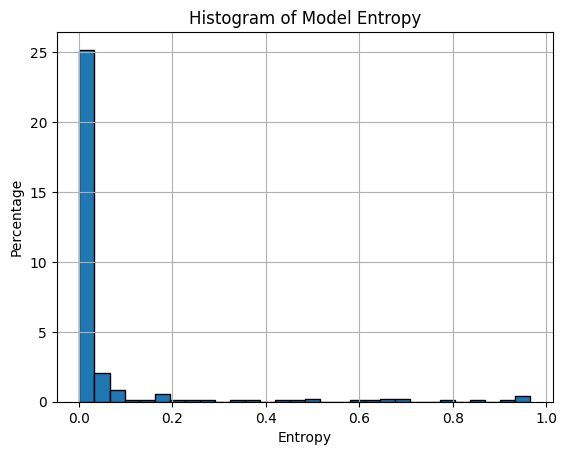

In [7]:
plt.hist(df["Full entropy"], bins=30, edgecolor='black', density=True)
plt.title("Histogram of Model Entropy")
plt.xlabel("Entropy")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

Now, let's look at the ROC curve for these

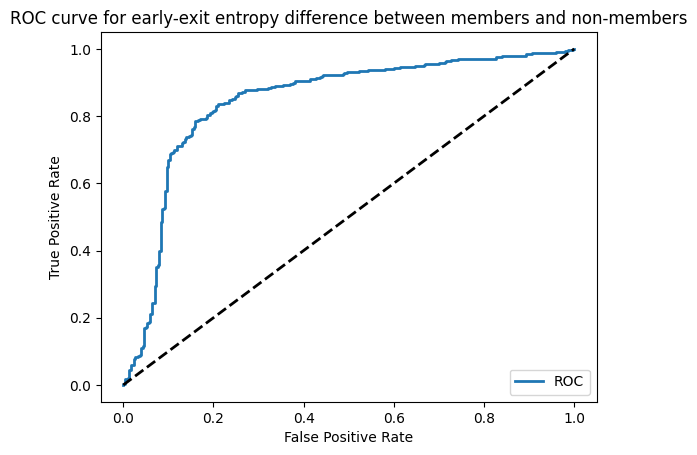

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load data
df_train = pd.read_csv("entropies_train.txt", header=None)
df_test = pd.read_csv("entropies_test.txt", header=None)

# Add a label column: 0 for train, 1 for test
df_train.insert(0, 'set', 1)
df_test.insert(0, 'set', 0)

# Merge the two DataFrames
df_combined = pd.concat([df_train, df_test], ignore_index=True)
labels = ["test", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "T11", "T12", "Early exit entropy", "Full entropy"]
df_combined.columns = labels

fpr, tpr, thresholds = roc_curve(df_combined["test"], df_combined["Early exit entropy"]);
plt.plot(fpr, tpr, lw=2, label=f'ROC')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for early-exit entropy difference between members and non-members')
plt.legend(loc="lower right")

What is the best threshold then?

In [15]:
# Compute Youden's J statistic
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"Best threshold using j-statistic: {best_threshold}")
print(f"True Positive Rate: {tpr[best_index]}")
print(f"False Positive Rate: {fpr[best_index]}")

Best threshold using j-statistic: 0.255241
True Positive Rate: 0.7860082304526749
False Positive Rate: 0.16
